In [ ]:
pip install torch

In [ ]:
pip install torchvision

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision import models
import rasterio

In [42]:
# Check if GPU is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pre-trained segmentation model (e.g., DeepLabV3)
model = models.segmentation.deeplabv3_resnet101(
    pretrained=True).to(device).eval()


def preprocess_image(image_path):
    # Open TIF file using rasterio
    with rasterio.open(image_path) as dataset:
        # Read the first three channels of the image
        image_bands = dataset.read([7, 3, 3]).transpose(1, 2, 0)

    # Convert image to float and normalize
    # Assuming 16-bit TIF, adjust if needed
    image_bands = image_bands.astype(np.float32) / 65535.0

    # Normalize the image bands
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[485, 456, 406], std=[
                             229, 224, 225]),
    ])

    input_tensor = transform(image_bands).unsqueeze(0).to(device)
    return input_tensor


# Load and preprocess an example TIF image
tif_image_path = r"D:\College files\TISS\Data\Sentinal.tif"
input_image = preprocess_image(tif_image_path)

# Perform inference
with torch.no_grad():
    output = model(input_image)['out'][0]
output_predictions = output.argmax(0).cpu().numpy()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


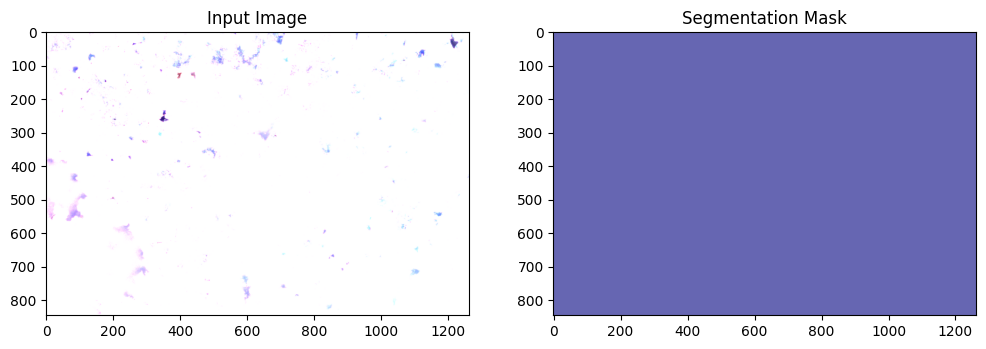

In [39]:
# Display the input image and the segmentation mask
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(rasterio.open(tif_image_path).read([1, 2, 3]).transpose(1, 2, 0))
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(output_predictions, cmap='jet', alpha=0.6)
plt.title("Segmentation Mask")

plt.show()

In [46]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision import models
import rasterio

# Check if GPU is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pre-trained segmentation model (e.g., DeepLabV3)
model = models.segmentation.deeplabv3_resnet101(
    pretrained=True).to(device).eval()


def preprocess_image(image_path, bands=[4, 3, 2]):
    # Open TIF file using rasterio
    with rasterio.open(image_path) as dataset:
        # Read the specified bands of the image
        image_bands = dataset.read(bands).transpose(1, 2, 0)

    # Convert image to float and normalize
    # Assuming 16-bit TIF, adjust if needed
    image_bands = image_bands.astype(np.float32) / 65535.0

    # Normalize the image bands
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[
                             0.229, 0.224, 0.225]),
    ])

    input_tensor = transform(image_bands).unsqueeze(0).to(device)
    return input_tensor


# Load and preprocess an example TIF image using bands 8, 4, 3
tif_image_path = r"D:\College files\TISS\Data\Sentinal.tif"
input_image = preprocess_image(tif_image_path, bands=[8, 4, 3])

# Perform inference
with torch.no_grad():
    output = model(input_image)['out'][0]
output_predictions = output.argmax(0).cpu().numpy()

# Display the input image and the segmentation mask with a color map
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(rasterio.open(tif_image_path).read([8, 4, 3]).transpose(1, 2, 0))
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(output_predictions, cmap='jet', alpha=0.6)
plt.title("Segmentation Mask")

plt.show()